In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [5]:
def GoldenCrossverSignal(name, data_point):
    path = f'../2)data/{name}.csv'
    data = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
    data['50_DMA'] = data.Close.rolling(window=50, min_periods=1).mean()
    data['200_DMA'] = data.Close.rolling(window=200, min_periods=1).mean()
    data['Signal'] = 0
    data['Signal'] = np.where(data['50_DMA'] > data['200_DMA'], 1, 0)
    data['Position'] = data.Signal.diff()
    plt.figure(figsize = (20,10))
    # plot close price, short-term and long-term moving averages 
    data.iloc[-data_point:]['Close'].plot(color = 'k', label= 'Close Price') 
    data.iloc[-data_point:]['50_DMA'].plot(color = 'b',label = '50-day DMA') 
    data.iloc[-data_point:]['200_DMA'].plot(color = 'g', label = '200-day DMA')
    # plot ‘buy’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == 1].index, 
             data.iloc[-data_point:]['50_DMA'][data.iloc[-data_point:]['Position'] == 1], 
             '^', markersize = 15, color = 'g', label = 'buy')
    # plot ‘sell’ signals
    plt.plot(data.iloc[-data_point:][data.iloc[-data_point:]['Position'] == -1].index, 
             data.iloc[-data_point:]['50_DMA'][data.iloc[-data_point:]['Position'] == -1], 
             'v', markersize = 15, color = 'r', label = 'sell')
    plt.ylabel('Price in Rupees', fontsize = 15 )
    plt.xlabel('Date', fontsize = 15 )
    plt.title(name, fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()
    df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
    print(tabulate(df_pos[['Close', 'Position']], headers = 'keys', tablefmt = 'psql'))

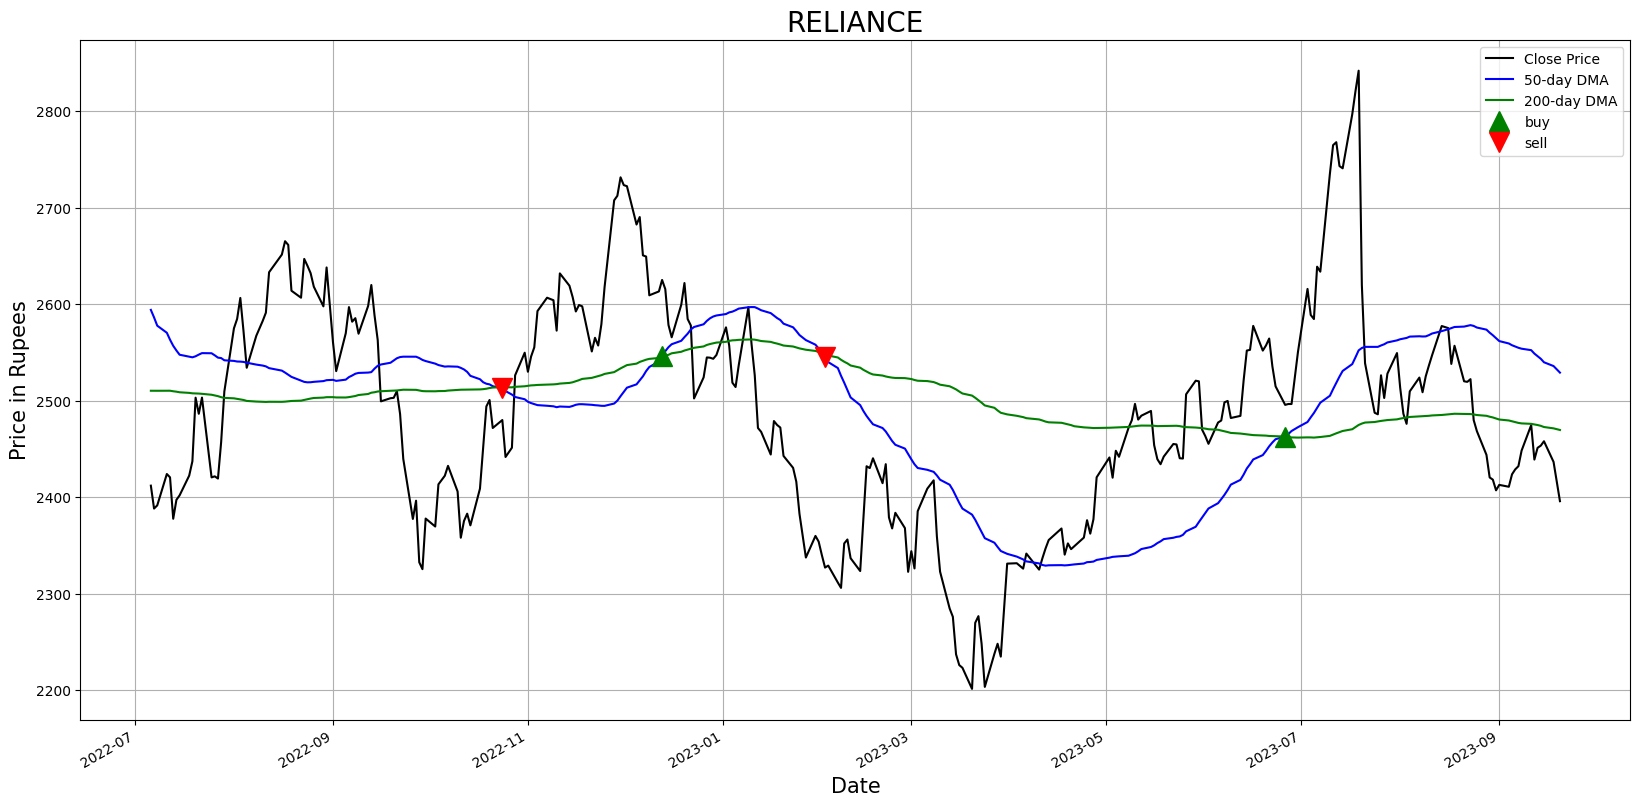

+---------------------+---------+------------+
| Date                |   Close | Position   |
|---------------------+---------+------------|
| 2022-10-24 00:00:00 | 2479.85 | Sell       |
| 2022-12-13 00:00:00 | 2625    | Buy        |
| 2023-02-02 00:00:00 | 2326.95 | Sell       |
| 2023-06-26 00:00:00 | 2495.55 | Buy        |
+---------------------+---------+------------+


C:\Users\Mahin\AppData\Local\Temp\ipykernel_17096\3836506540.py:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pos = data.iloc[-data_point:][(data.iloc[-data_point:]['Position'] == 1) | (data['Position'] == -1)].copy()


In [6]:
GoldenCrossverSignal('RELIANCE',300)